In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200207_new data'

In [3]:
file=f'{bigDir}\cellinfo_200203_v6.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations 

In [5]:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [6]:
data.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,physical_age,mol_age_mod
0,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,3.0,...,1.781812e+09,9.422495e+08,553948216.0,388301238.0,1.841376e+09,447865672.0,1.393510e+09,d20200203,2.333333,0.225
1,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,3.0,...,1.768828e+09,7.339286e+08,333304109.0,400624497.0,1.888008e+09,519804886.0,1.368203e+09,d20200203,1.333333,0.166
2,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,3.0,...,1.844853e+09,7.447588e+08,334218140.0,410540672.0,1.937367e+09,503054477.0,1.434312e+09,d20200203,1.333333,0.166
3,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,3.0,...,2.026255e+09,1.034361e+09,571961971.0,462399349.0,1.946238e+09,382382236.0,1.563856e+09,d20200203,6.833333,0.684
4,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,3.0,...,2.058831e+09,1.055251e+09,627925856.0,427324886.0,2.059953e+09,428447160.0,1.631506e+09,d20200203,4.166667,0.376


In [7]:
Luc=data.loc[(data.group=='siLuc'),:].copy()

In [8]:
MCM3=data.loc[(data.group=='siMCM3'),:].copy()

# group 'siLuc'
## first 11 plots = total nucleus 

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


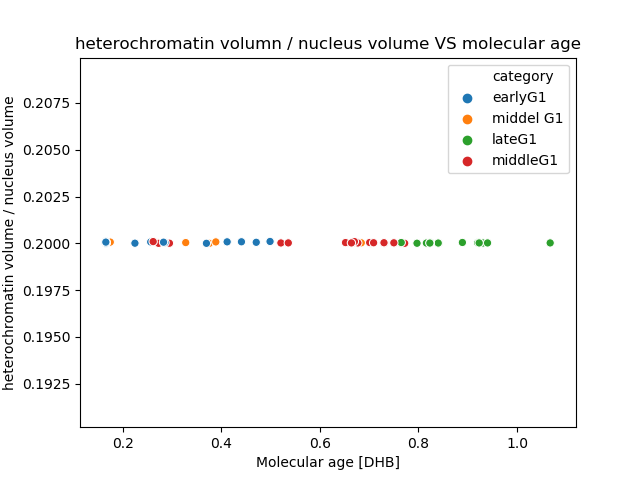

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age')

In [9]:
%matplotlib notebook
Luc['temp']=Luc.nuc_vol_het/Luc.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


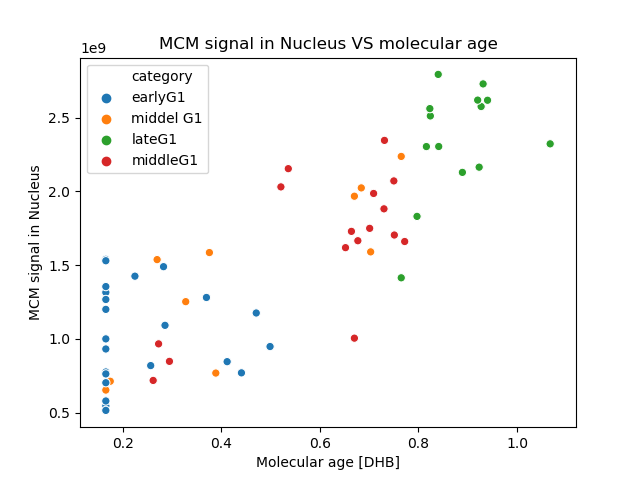

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [10]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


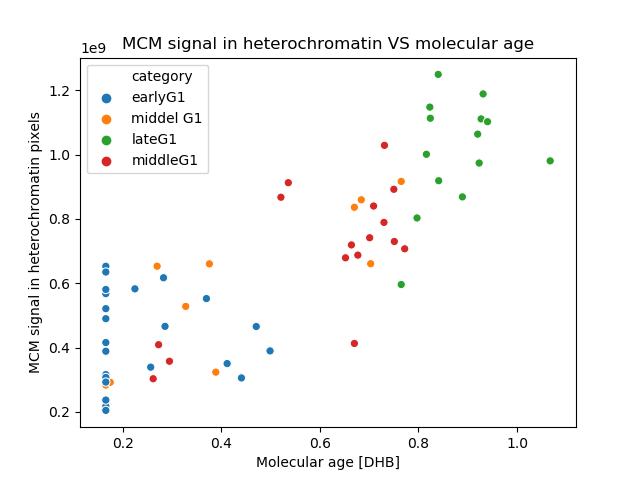

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [11]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


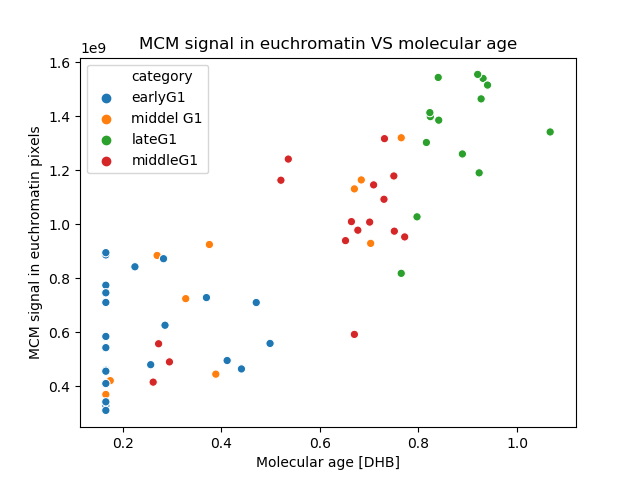

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [12]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


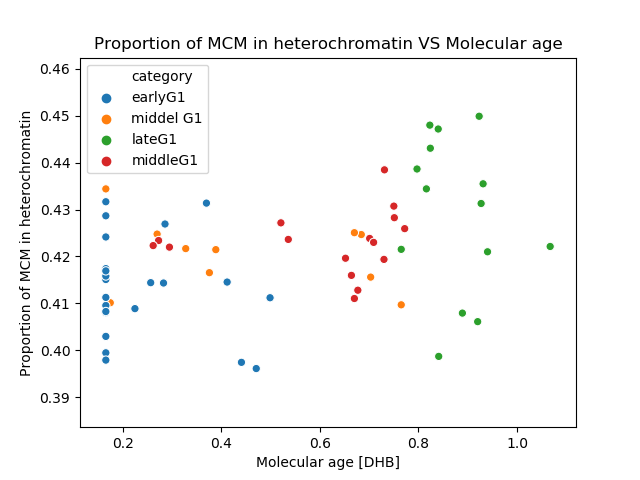

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [13]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


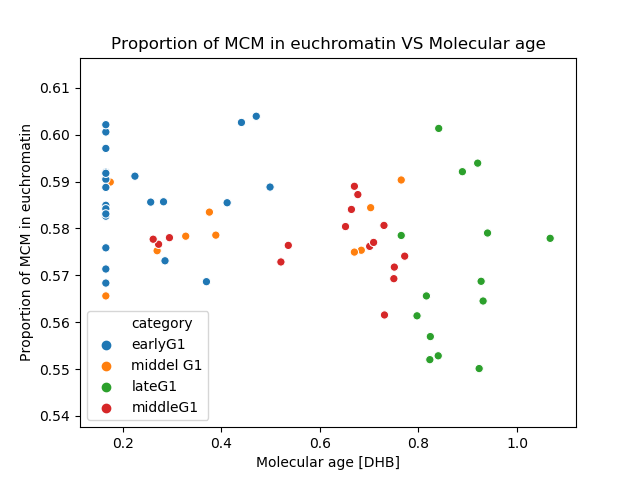

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [14]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_eu/Luc.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


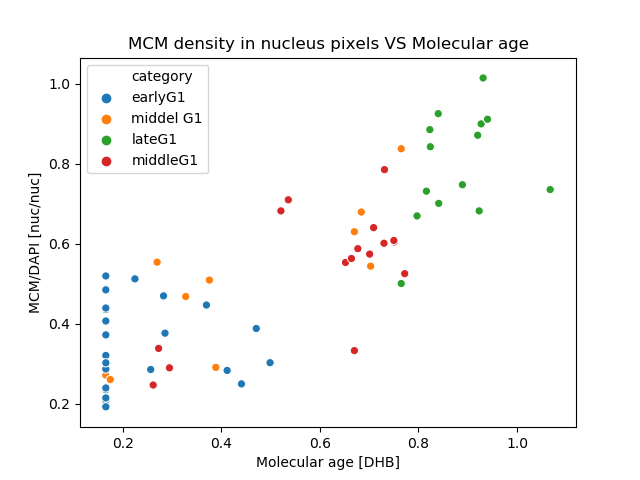

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [15]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_total/Luc.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


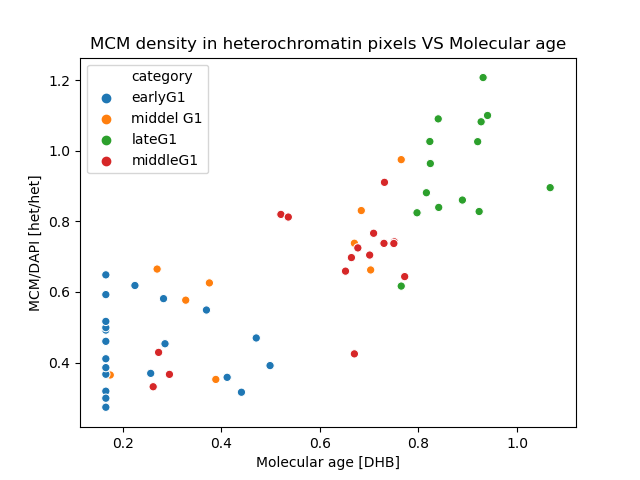

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [16]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


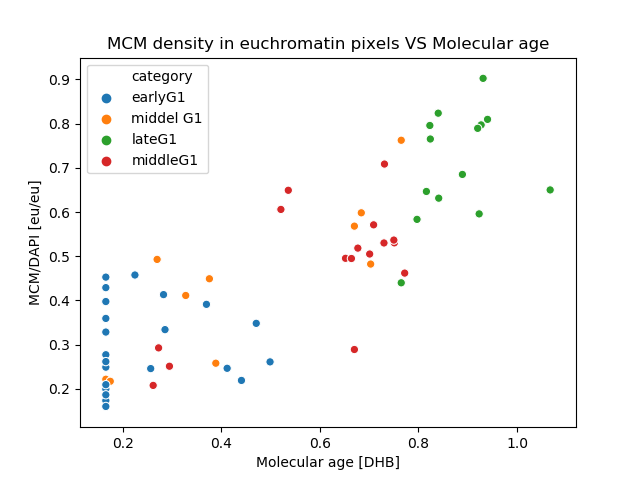

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [17]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_eu/Luc.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


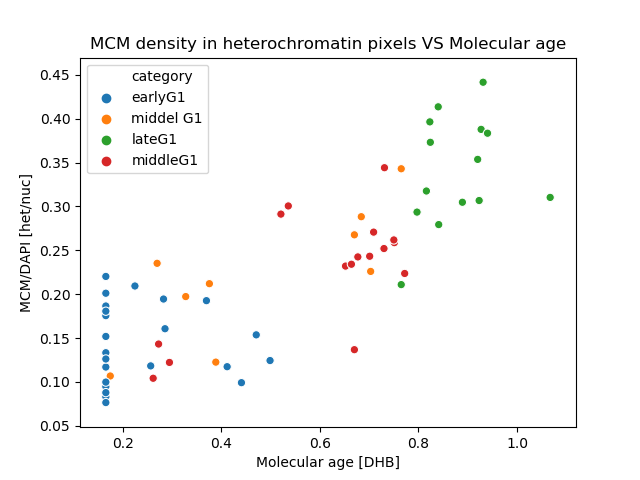

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [18]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


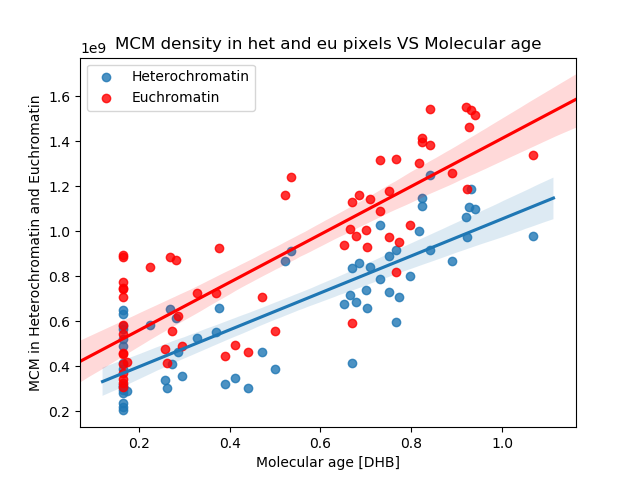

In [19]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_het
Luc['temp2']=Luc.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=Luc.loc[(['G1' in x for x in Luc.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



## 11. MCM/Vol in total, het, eu

<IPython.core.display.Javascript object>


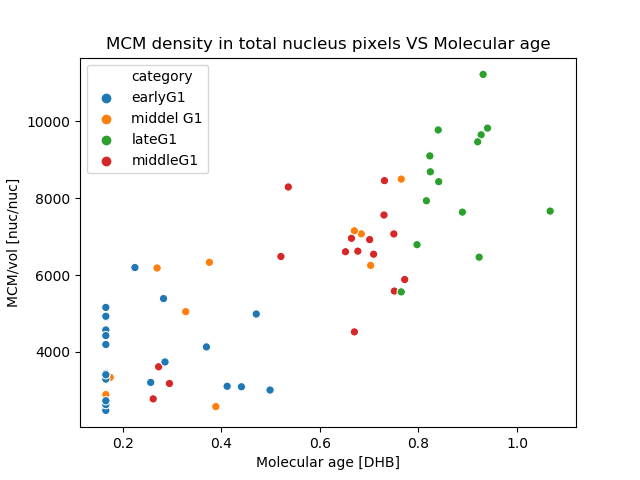

Text(0.5, 1.0, 'MCM density in total nucleus pixels VS Molecular age')

In [23]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_total/Luc.nuc_vol_total

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [nuc/nuc]')
plt.title('MCM density in total nucleus pixels VS Molecular age')

<IPython.core.display.Javascript object>


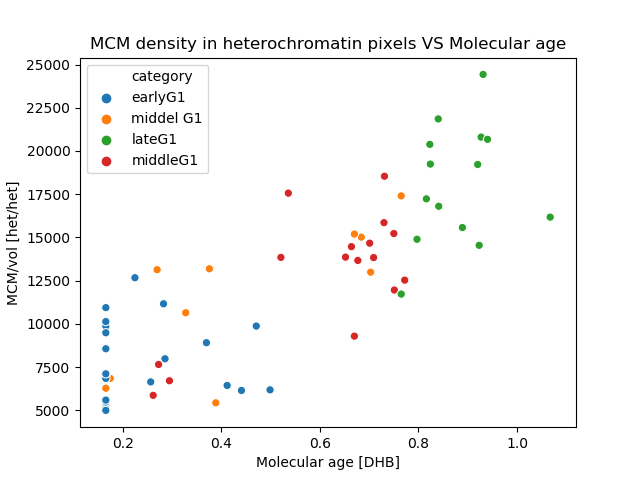

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [24]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_het/Luc.nuc_vol_het

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

<IPython.core.display.Javascript object>


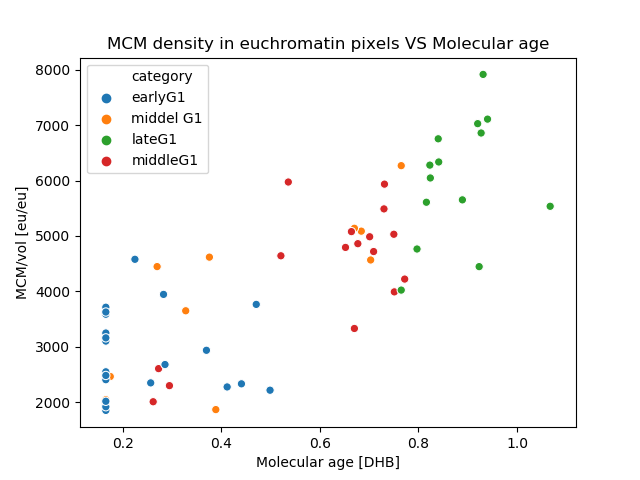

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [25]:
%matplotlib notebook
Luc['temp']=Luc.nuc_mcm_eu/Luc.nuc_vol_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=Luc.loc[(['G1' in x for x in Luc.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

# siMCM3

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


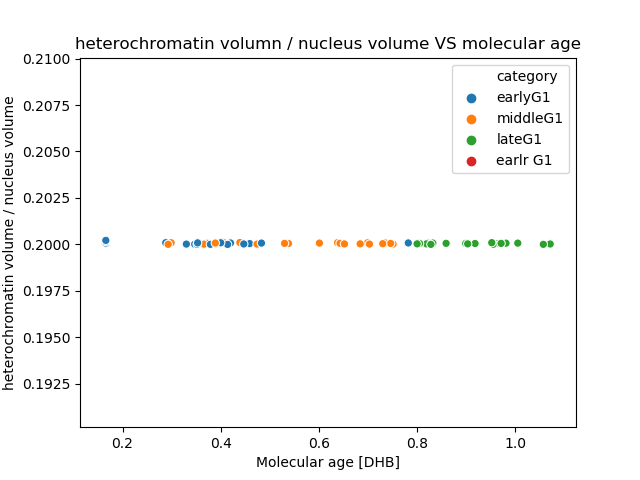

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age')

In [26]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_vol_het/MCM3.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


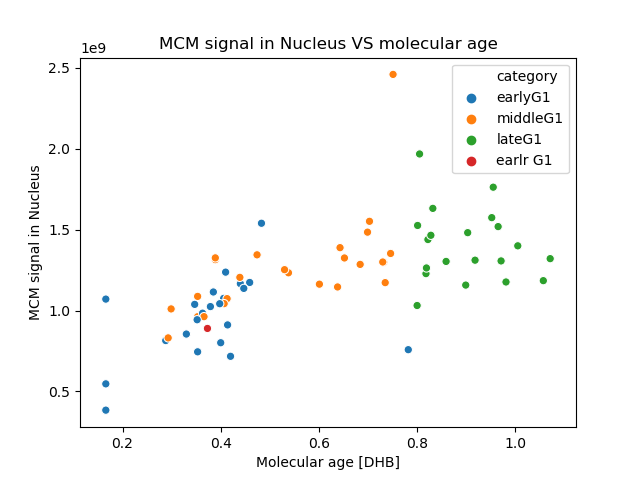

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [27]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

<IPython.core.display.Javascript object>


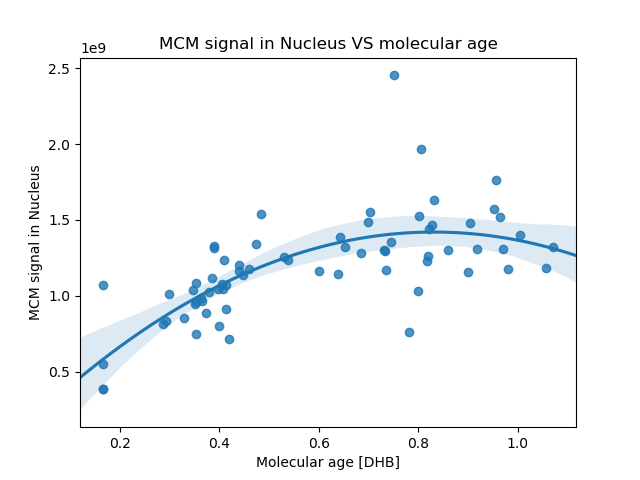

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [28]:
# second order polynomial regression 
%matplotlib notebook

sn.regplot(x='mol_age_mod',y='nuc_mcm_total',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


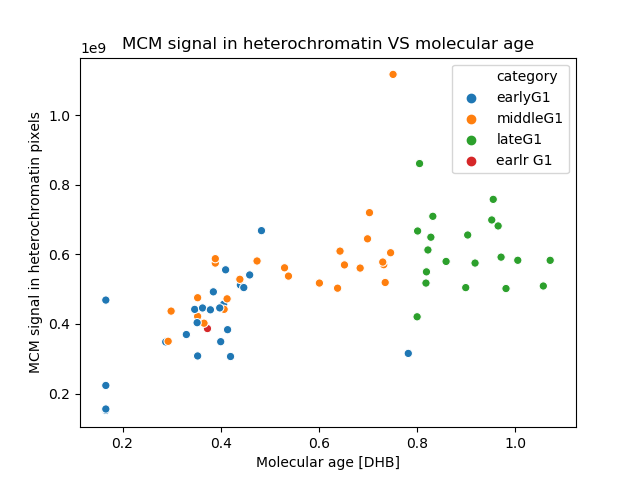

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [29]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

<IPython.core.display.Javascript object>


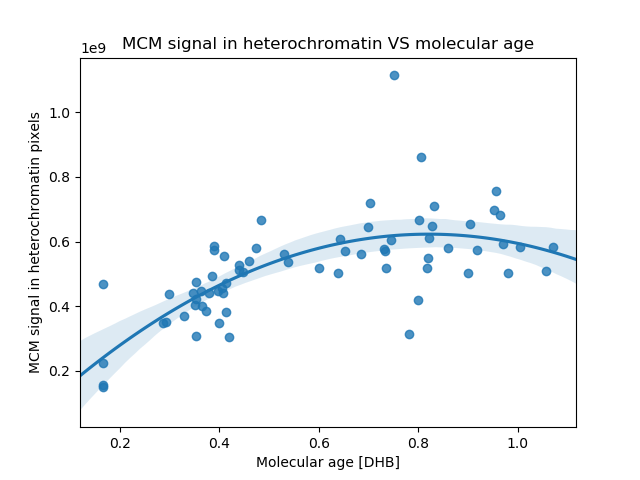

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [30]:
# second order polynomial regression 
%matplotlib notebook

sn.regplot(x='mol_age_mod',y='nuc_mcm_het',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


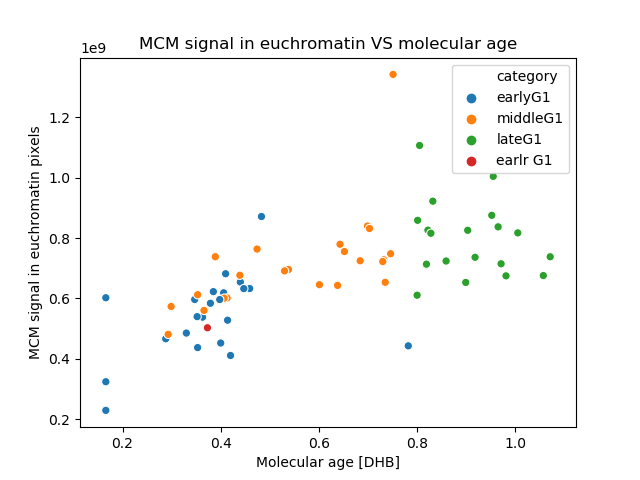

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [31]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

<IPython.core.display.Javascript object>


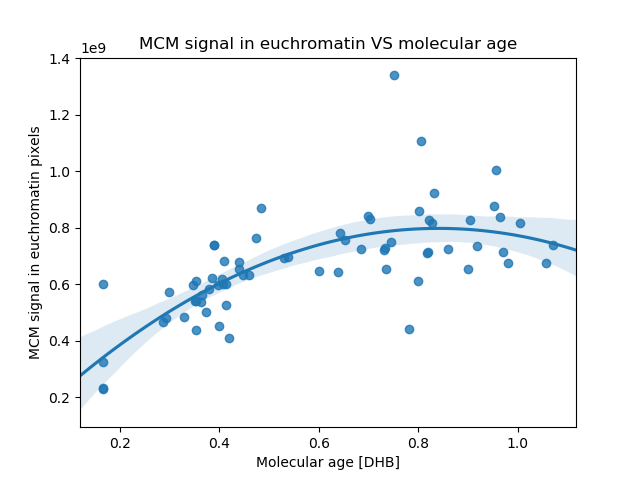

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [32]:
# second order polynomial regression
%matplotlib notebook

sn.regplot(x='mol_age_mod',y='nuc_mcm_eu',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


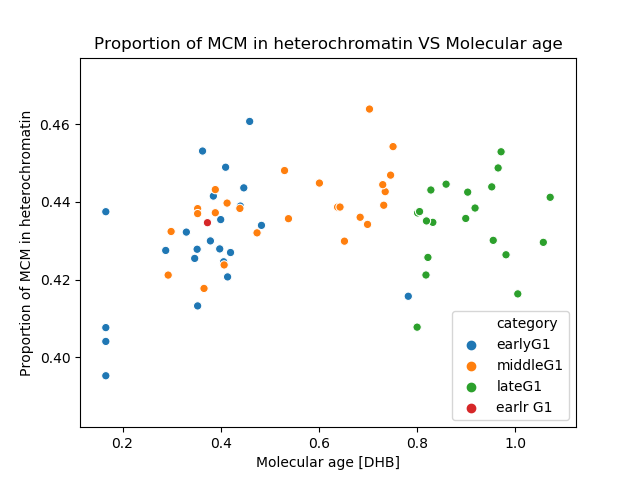

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [33]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

<IPython.core.display.Javascript object>


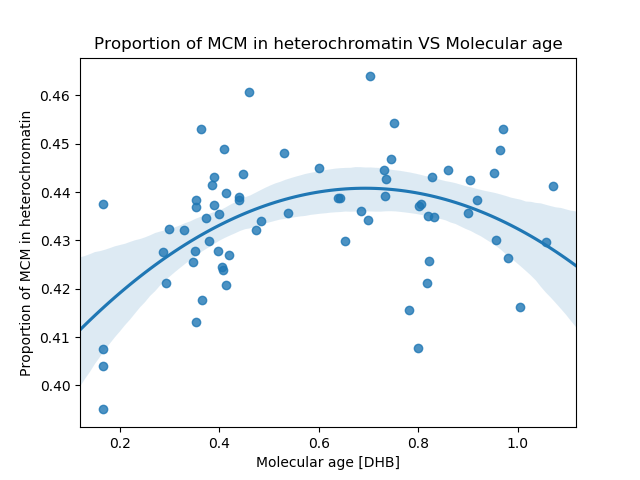

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [34]:
# second order polynomial regression
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_mcm_total

sn.regplot(x='mol_age_mod',y='temp',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


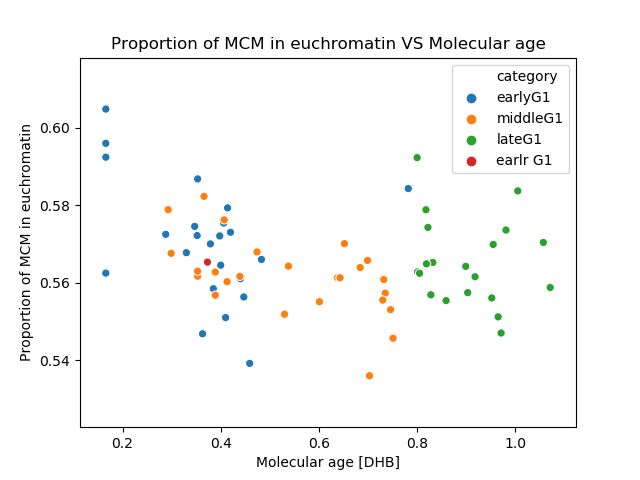

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [35]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_eu/MCM3.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

<IPython.core.display.Javascript object>


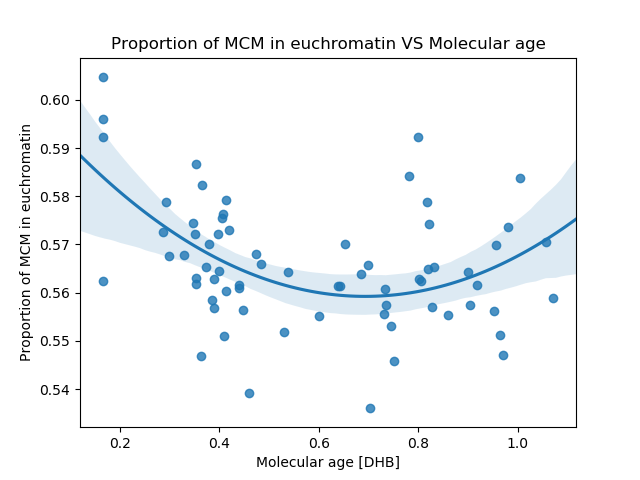

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [36]:
# second order polynomial regression
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_eu/MCM3.nuc_mcm_total

sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


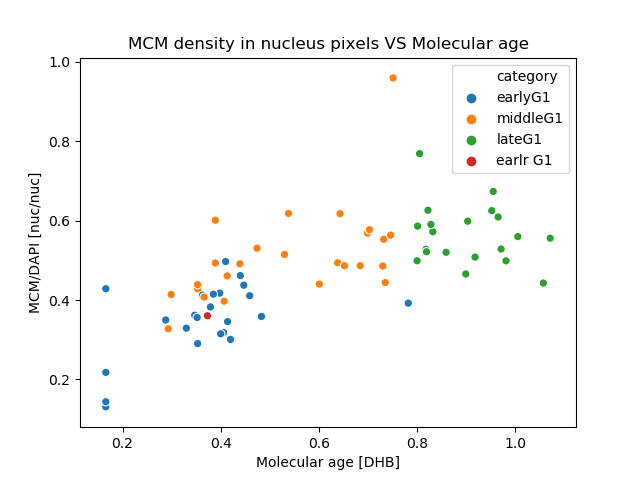

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [37]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_total/MCM3.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

<IPython.core.display.Javascript object>


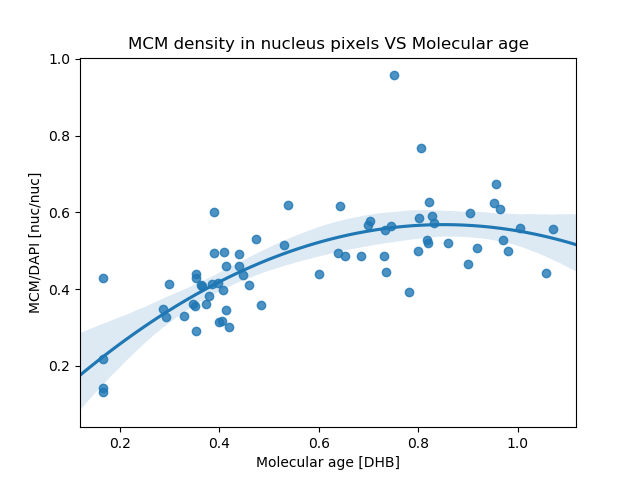

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [38]:
# second order polynomial regression
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_total/MCM3.nuc_DAPI_total

sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


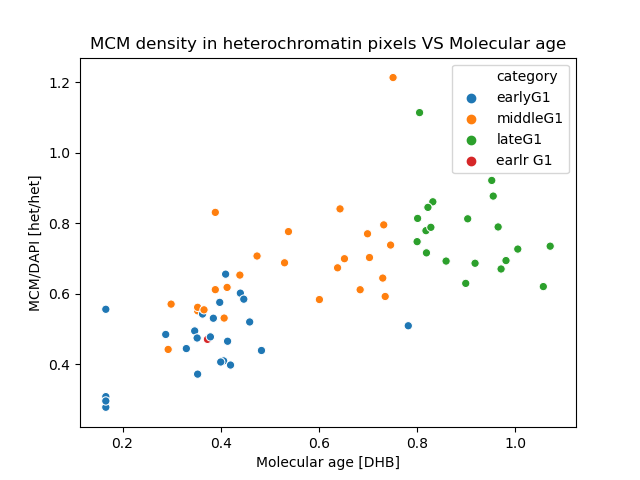

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [39]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

<IPython.core.display.Javascript object>


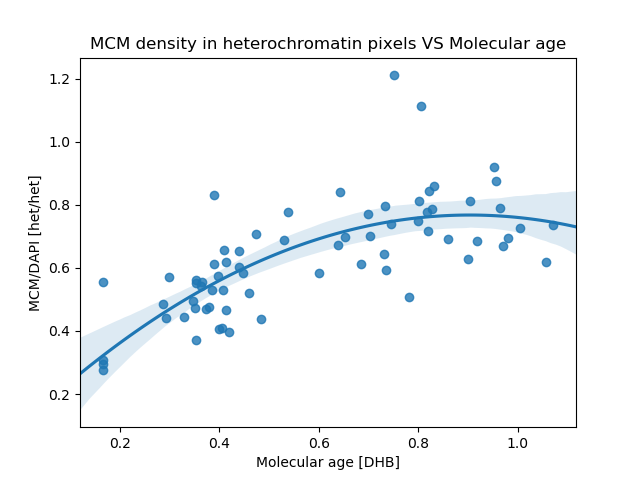

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [40]:
# second order polynomial regression
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_het

sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


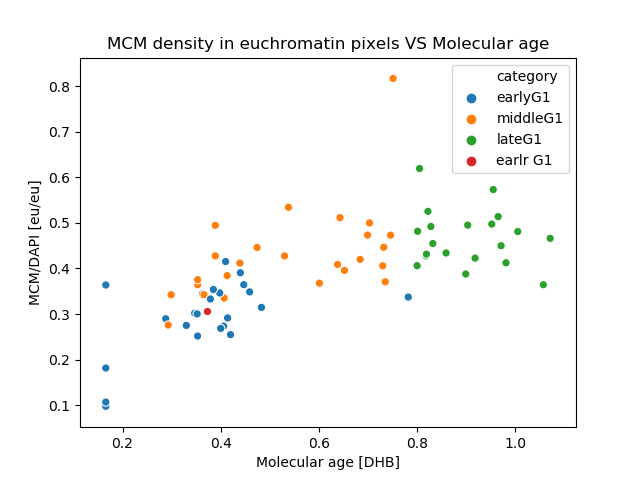

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [41]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_eu/MCM3.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

<IPython.core.display.Javascript object>


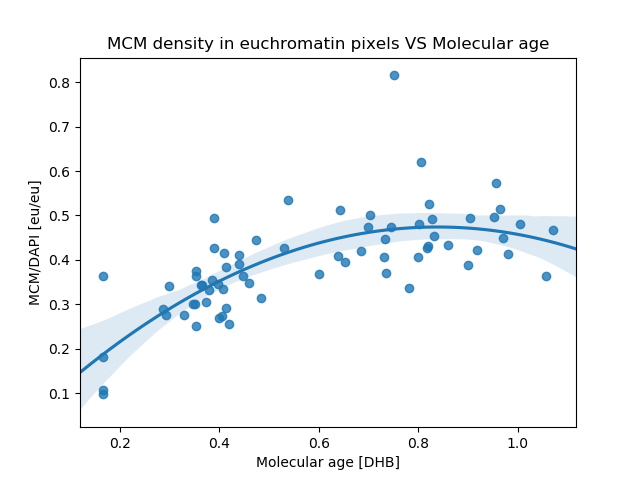

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [42]:
# second order polynomial regression
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_eu/MCM3.nuc_DAPI_eu

sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


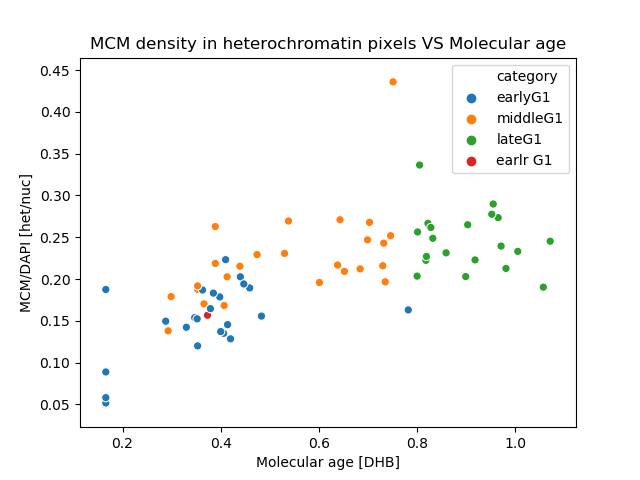

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [43]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

<IPython.core.display.Javascript object>


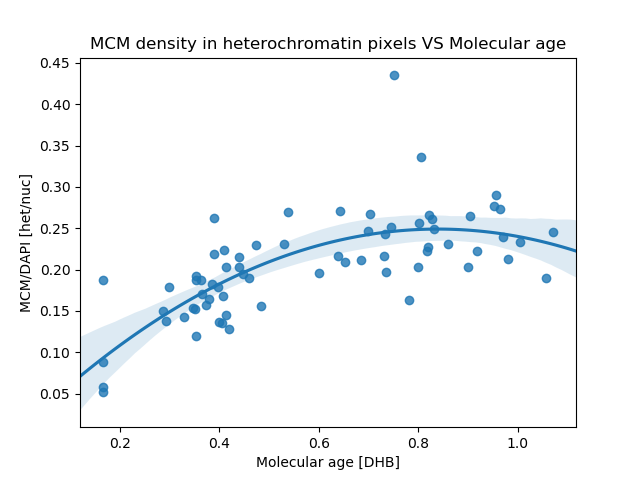

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [44]:
#second order polynomial regression
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_DAPI_total

sn.regplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


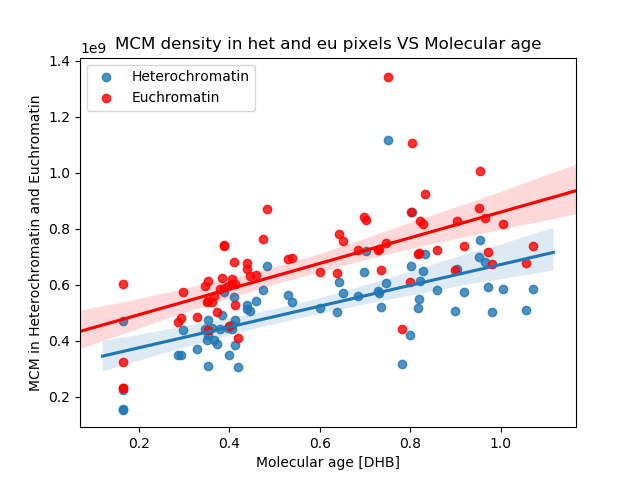

In [45]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het
MCM3['temp2']=MCM3.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



<IPython.core.display.Javascript object>


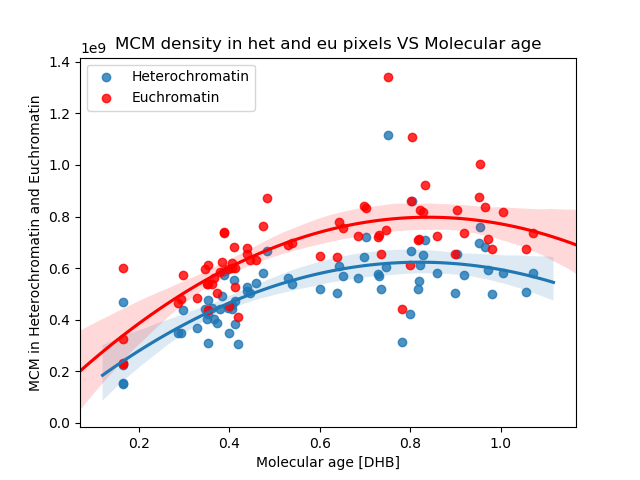

In [46]:
# second order polynomial regression 
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het
MCM3['temp2']=MCM3.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], 
           label = 'Heterochromatin', order=2)


sn.regplot(x='mol_age_mod', y = 'temp2',data=MCM3.loc[(['G1' in x for x in MCM3.category]),:], color="r",
           label = 'Euchromatin',order=2)
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")


## 11. MCM/Vol in total, het, eu

<IPython.core.display.Javascript object>


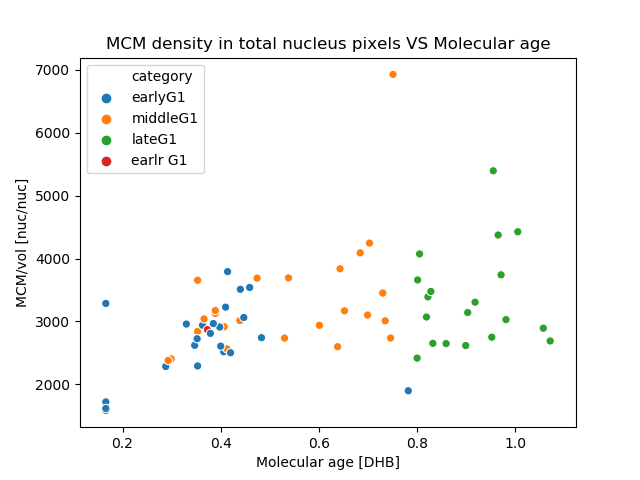

Text(0.5, 1.0, 'MCM density in total nucleus pixels VS Molecular age')

In [47]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_total/MCM3.nuc_vol_total

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [nuc/nuc]')
plt.title('MCM density in total nucleus pixels VS Molecular age')

<IPython.core.display.Javascript object>


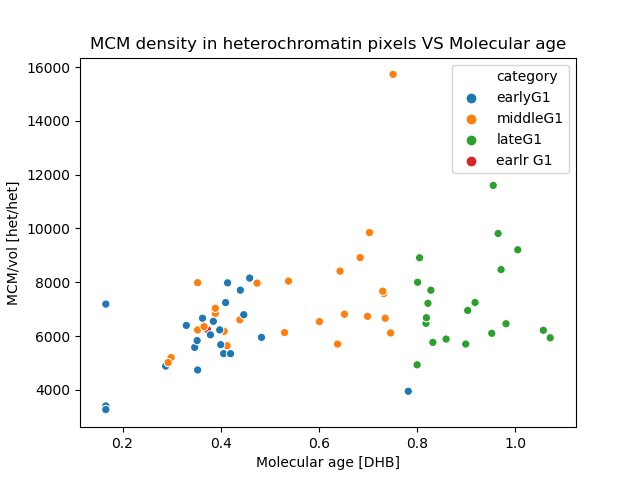

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [48]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_het/MCM3.nuc_vol_het

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

<IPython.core.display.Javascript object>


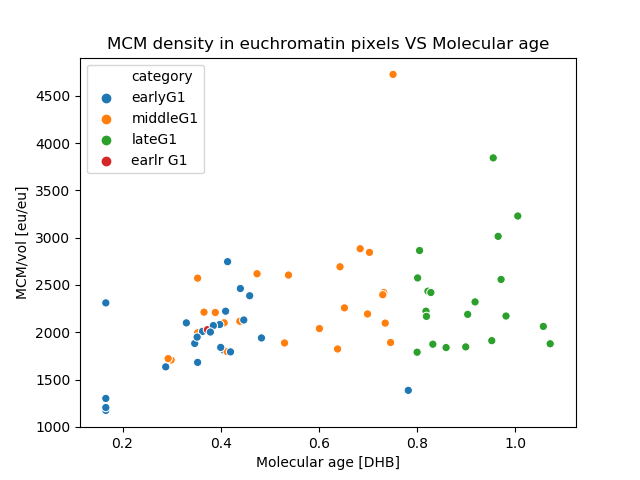

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [49]:
%matplotlib notebook
MCM3['temp']=MCM3.nuc_mcm_eu/MCM3.nuc_vol_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=MCM3.loc[(['G1' in x for x in MCM3.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/vol [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')